<a href="https://colab.research.google.com/github/PRARTHANA-G01/Stock_market_prediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install nltk

In [3]:
pip install seaborn

In [4]:
df1= pd.read_csv('/content/stock_tweets.csv')
df2 = pd.read_csv('/content/stock_yfinance_data.csv')

In [5]:
df1.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [6]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


#Data Preprocessing


In [7]:
import re

In [9]:
def preprocess_df1(tweet):
  tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)  # Remove URLs
  tweet = re.sub(r'@\w+|\#', '', tweet)  # Remove mentions and hashtags
  tweet = tweet.lower()  # Convert to lowercase
  tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove special characters
  return tweet


df1['Cleaned_Tweet'] = df1['Tweet'].apply(preprocess_df1)


In [10]:
df1.head()

,Date,Tweet,Stock Name,Company Name,Cleaned_Tweet
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...


In [11]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.date

In [12]:
df1.head()

,Date,Tweet,Stock Name,Company Name,Cleaned_Tweet
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...


In [16]:
df2['Date'] = pd.to_datetime(df2['Date'])


In [17]:

print(df2.isnull().sum())


Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64


In [19]:
df2['Stock Name'] = df2['Stock Name'].str.upper()



In [20]:
df2['Daily_Return'] = df2['Adj Close'].pct_change()


In [21]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Daily_Return
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,NaN
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,-0.000335
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,0.008140
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,-0.001203
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,0.002767


In [22]:
df2.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Daily_Return
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,-0.000335
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,0.008140
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,-0.001203
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,0.002767
5,2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400,TSLA,0.013874
...,...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV,-0.002183
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV,0.048140
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV,-0.045929
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV,-0.027717


In [26]:
df2 = df2[['Date', 'Adj Close', 'Stock Name','Daily_Return']]

df2


,Date,Adj Close,Stock Name,Daily_Return
0,2021-09-30,258.493347,TSLA,NaN
1,2021-10-01,258.406677,TSLA,-0.000335
2,2021-10-04,260.510010,TSLA,0.008140
3,2021-10-05,260.196655,TSLA,-0.001203
4,2021-10-06,260.916656,TSLA,0.002767
...,...,...,...,...
6295,2022-09-23,13.710000,XPEV,-0.002183
6296,2022-09-26,14.370000,XPEV,0.048140
6297,2022-09-27,13.710000,XPEV,-0.045929
6298,2022-09-28,13.330000,XPEV,-0.027717


In [28]:
# Drop NaN values only in the 'Daily_Return' column
df2 = df2.dropna(subset=['Daily_Return'])
df2

,Date,Adj Close,Stock Name,Daily_Return
1,2021-10-01,258.406677,TSLA,-0.000335
2,2021-10-04,260.510010,TSLA,0.008140
3,2021-10-05,260.196655,TSLA,-0.001203
4,2021-10-06,260.916656,TSLA,0.002767
5,2021-10-07,264.536682,TSLA,0.013874
...,...,...,...,...
6295,2022-09-23,13.710000,XPEV,-0.002183
6296,2022-09-26,14.370000,XPEV,0.048140
6297,2022-09-27,13.710000,XPEV,-0.045929
6298,2022-09-28,13.330000,XPEV,-0.027717


#Sentiment analysis on tweets


In [29]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [31]:
analyse  = SentimentIntensityAnalyzer()

In [33]:

df1['Sentiment_Score'] = df1['Cleaned_Tweet'].apply(lambda tweet: analyse.polarity_scores(tweet)['compound'])


The Sentiment_Score column will contain the compound sentiment score for each tweet, ranging from:
-1: Most negative
0: Neutral
+1: Most positive

In [34]:
print(df1[['Date', 'Tweet', 'Sentiment_Score']].head())

         Date                                              Tweet  \
0  2022-09-29  Mainstream media has done an amazing job at br...   
1  2022-09-29  Tesla delivery estimates are at around 364k fr...   
2  2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...   
3  2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4  2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...   

   Sentiment_Score  
0           0.0772  
1           0.0000  
2           0.2960  
3          -0.7096  
4          -0.8750  


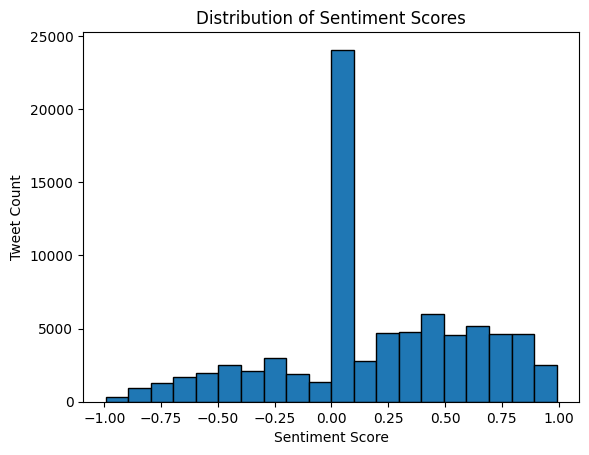

In [35]:
import matplotlib.pyplot as plt

plt.hist(df1['Sentiment_Score'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Tweet Count')
plt.show()
